In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image


In [3]:

accident_df=pd.read_csv("C:/Users/PC-DELL/OneDrive/Desktop/DV J COMP/Datasets_DV/Accidents0514.csv")
casual_df=pd.read_csv("C:/Users/PC-DELL/OneDrive/Desktop/DV J COMP/Datasets_DV/Casualties0514.csv")
vehicle_df=pd.read_csv("C:/Users/PC-DELL/OneDrive/Desktop/DV J COMP/Datasets_DV/Vehicles0514.csv")


C:\Users\PC-DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
casual_df.head()


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [6]:
accident_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [58]:
vehicle_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [59]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1640597 non-null  object 
 1   Location_Easting_OSGR                        1640486 non-null  float64
 2   Location_Northing_OSGR                       1640486 non-null  float64
 3   Longitude                                    1640486 non-null  float64
 4   Latitude                                     1640486 non-null  float64
 5   Police_Force                                 1640597 non-null  int64  
 6   Accident_Severity                            1640597 non-null  int64  
 7   Number_of_Vehicles                           1640597 non-null  int64  
 8   Number_of_Casualties                         1640597 non-null  int64  
 9   Date                                         1

In [60]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Accident_Index                    object
 1   Vehicle_Reference                 int64 
 2   Vehicle_Type                      int64 
 3   Towing_and_Articulation           int64 
 4   Vehicle_Manoeuvre                 int64 
 5   Vehicle_Location-Restricted_Lane  int64 
 6   Junction_Location                 int64 
 7   Skidding_and_Overturning          int64 
 8   Hit_Object_in_Carriageway         int64 
 9   Vehicle_Leaving_Carriageway       int64 
 10  Hit_Object_off_Carriageway        int64 
 11  1st_Point_of_Impact               int64 
 12  Was_Vehicle_Left_Hand_Drive?      int64 
 13  Journey_Purpose_of_Driver         int64 
 14  Sex_of_Driver                     int64 
 15  Age_of_Driver                     int64 
 16  Age_Band_of_Driver                int64 
 17  Engine_C

In [61]:
casual_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      int64 
 4   Sex_of_Casualty                     int64 
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


In [4]:
first_df=pd.merge(casual_df,accident_df,on='Accident_Index')
df=pd.merge(first_df,vehicle_df,on='Accident_Index')

MemoryError: Unable to allocate 288. MiB for an array with shape (23, 1640597) and data type int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4287593 entries, 0 to 4287592
Data columns (total 67 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Vehicle_Reference_x                          int64  
 2   Casualty_Reference                           int64  
 3   Casualty_Class                               int64  
 4   Sex_of_Casualty                              int64  
 5   Age_of_Casualty                              int64  
 6   Age_Band_of_Casualty                         int64  
 7   Casualty_Severity                            int64  
 8   Pedestrian_Location                          int64  
 9   Pedestrian_Movement                          int64  
 10  Car_Passenger                                int64  
 11  Bus_or_Coach_Passenger                       int64  
 12  Pedestrian_Road_Maintenance_Worker           int64  
 13  Casualty_Typ

In [65]:
#displaying top 5 values
df.head()


,Accident_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,2,1,1,1,62,9,3,0,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,1,1,1,62,9,3,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,1,3,1,30,6,3,5,2,...,1,15,2,49,8,1769,1,4,2,1


In [66]:
#checking how many values are 0
df.isnull().sum()

Accident_Index           0
Vehicle_Reference_x      0
Casualty_Reference       0
Casualty_Class           0
Sex_of_Casualty          0
                        ..
Engine_Capacity_(CC)     0
Propulsion_Code          0
Age_of_Vehicle           0
Driver_IMD_Decile        0
Driver_Home_Area_Type    0
Length: 67, dtype: int64

In [67]:
#???
df.drop('LSOA_of_Accident_Location',axis=1,inplace=True)
df.dropna(subset=['Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude'],axis=0,inplace=True)
df.dropna(subset=['Time'],axis=0,inplace=True)


In [14]:
df.isnull().values.any()

False

Percentage of accidents occur in urban areas is 64%
Percentage of accidents occur in rural areas is 36%


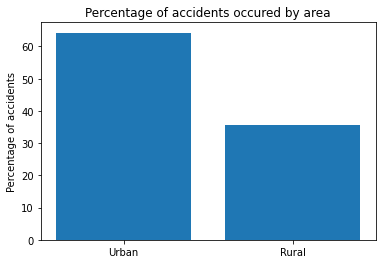

In [21]:
urban_acci =len(accident_df[accident_df['Urban_or_Rural_Area']==1])
rural_acci =len(accident_df[accident_df['Urban_or_Rural_Area']==2])
na_acci =len(accident_df[accident_df['Urban_or_Rural_Area']==3])
total_acci = urban_acci + rural_acci + na_acci
urban_pct = urban_acci / total_acci * 100
rural_pct = rural_acci / total_acci *100
na_pct = na_acci / total_acci * 100
print("Percentage of accidents occur in urban areas is {0:.0f}%".format(urban_pct))
print("Percentage of accidents occur in rural areas is {0:.0f}%".format(rural_pct))
x = ['Urban', 'Rural']
y = [urban_pct, rural_pct]
x_pos =list(range(len(x)))
plt.bar(x_pos, y)
plt.ylabel('Percentage of accidents')
plt.xticks(x_pos,x)
plt.title("Percentage of accidents occured by area")
plt.show()


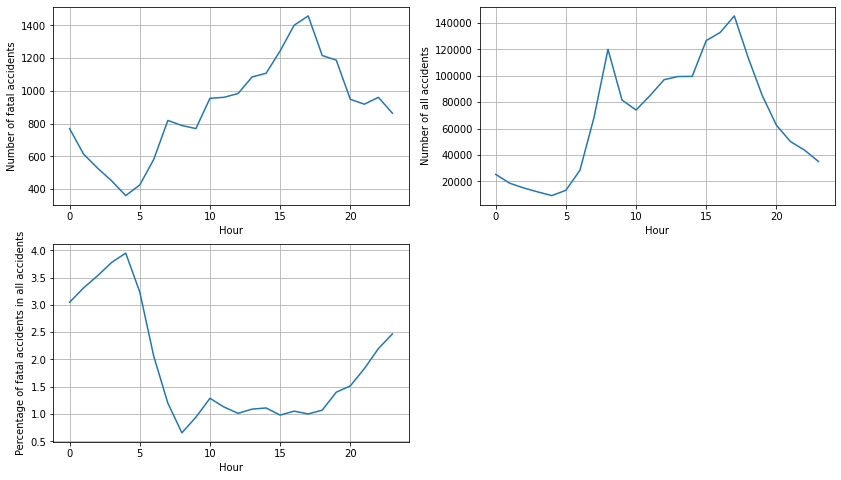

The most dangerous hour to drive, when most fatal accidents happend in all accidents,is 4 o'clock


In [22]:
accident_df['Hour'] = accident_df['Time'].map(lambda x: str(x).split(':')[0])
accident_df['Hour'] = accident_df['Hour'].apply(pd.to_numeric, errors='coerce')
hour = []
num_of_fatal_acci = []
num_of_acci = []
for i in range(24):
    hour.append(i)
    num_of_fatal_acci_hour = len(accident_df[(accident_df['Accident_Severity']== 1) & (accident_df['Hour'] == i)])
    num_of_acci_hour = len(accident_df[accident_df['Hour'] == i])
    num_of_fatal_acci.append(num_of_fatal_acci_hour)
    num_of_acci.append(num_of_acci_hour)
    normalized_num_of_fatal_acci = list(np.array(num_of_fatal_acci) / np.array(num_of_acci) *100)
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot(hour, num_of_fatal_acci)
ax1.set_ylabel('Number of fatal accidents')
ax1.set_xlabel('Hour')
ax1.grid(True)
ax2 = fig.add_subplot(222)
ax2.plot(hour, num_of_acci)
ax2.set_ylabel('Number of all accidents')
ax2.set_xlabel('Hour')
ax2.grid(True)
ax3 = fig.add_subplot(223)
ax3.plot(hour, normalized_num_of_fatal_acci)
ax3.set_ylabel('Percentage of fatal accidents in all accidents')
ax3.set_xlabel('Hour')
ax3.grid(True)
plt.show()
print("The most dangerous hour to drive, when most fatal accidents happend in all accidents,is {} o'clock".format(normalized_num_of_fatal_acci.index(max(normalized_num_of_fatal_acci))))


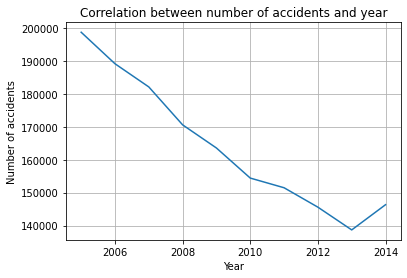

In [23]:
accident_df['Year'] = accident_df['Accident_Index'].map(lambda x: str(x)[:4])
accident_df['Year'] = accident_df['Year'].apply(pd.to_numeric, errors='coerce')
year = []
num_of_acci_year = []
for i in range(2005, 2015):
    year.append(i)
    num_of_acci_year.append(len(accident_df[accident_df['Year'] == i]))
plt.plot(year, num_of_acci_year)
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Correlation between number of accidents and year')
plt.grid(True)
plt.show()



Percentage of Deaths is 1%
Percentage of Major Injuries is 11%
Percentage of Minor Injuires is 88%


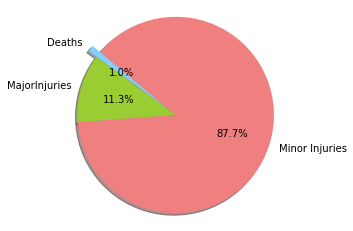

In [25]:
Severity1 =len(casual_df[casual_df['Casualty_Severity']==1])
Severity2 =len(casual_df[casual_df['Casualty_Severity']==2])
Severity3 =len(casual_df[casual_df['Casualty_Severity']==3])
tot=Severity1+Severity2+Severity3;
s1=(Severity1/tot)*100;
s2=(Severity2/tot)*100;
s3=(Severity3/tot)*100;
print("Percentage of Deaths is {0:.0f}%".format(s1))
print("Percentage of Major Injuries is {0:.0f}%".format(s2))
print("Percentage of Minor Injuires is {0:.0f}%".format(s3))
labels = 'Deaths','MajorInjuries','Minor Injuries'
sizes = [s1, s2, s3]
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

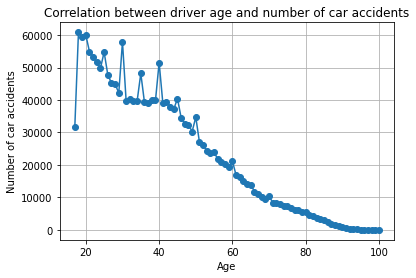

In [26]:
age_acci = vehicle_df[['Accident_Index', 'Age_of_Driver', 'Vehicle_Type']]
age = []
num_of_acci = []
for i in range(17, max(age_acci['Age_of_Driver'])+1):
    age.append(i)
    num_of_acci.append(len(age_acci[(age_acci['Age_of_Driver']==i)&(age_acci['Vehicle_Type']== 9 )]))
plt.plot(age, num_of_acci, label = 'Data', marker = 'o')
plt.xlabel('Age')
plt.ylabel('Number of car accidents')
plt.title('Correlation between driver age and number of car accidents')
plt.grid(True)
plt.show()


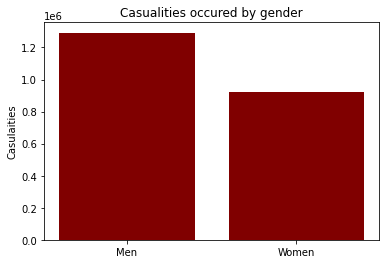

In [27]:
men =len(casual_df[casual_df['Sex_of_Casualty']==1])
women =len(casual_df[casual_df['Sex_of_Casualty']==2])
x = ['Men', 'Women']
y = [men,women]
x_pos =list(range(len(x)))
plt.bar(x_pos, y,color ='maroon')
plt.ylabel('Casulaities')
plt.xticks(x_pos,x)
plt.title("Casualities occured by gender")
plt.show()

In [30]:
#creating function to add month column to the dataset
def month(string):
    return int(string[3:5])
df['Month']=df['Date'].apply(lambda x: month(x))

In [31]:
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))


In [86]:
q7df=pd.DataFrame(data=df,columns=['Hour','Day_of_Week','Month','Accident_Severity'])

In [87]:
q7df.head()

,Hour,Day_of_Week,Month,Accident_Severity
0,NaN,3,NaN,2
1,NaN,4,NaN,3
2,NaN,5,NaN,3
3,NaN,5,NaN,3
4,NaN,6,NaN,3


In [88]:
q7df=q7df[q7df.Accident_Severity ==1]
q7df.head()

,Hour,Day_of_Week,Month,Accident_Severity
1646,NaN,4,NaN,1
1647,NaN,4,NaN,1
1648,NaN,4,NaN,1
1649,NaN,4,NaN,1
34637,NaN,4,NaN,1


<AxesSubplot:>

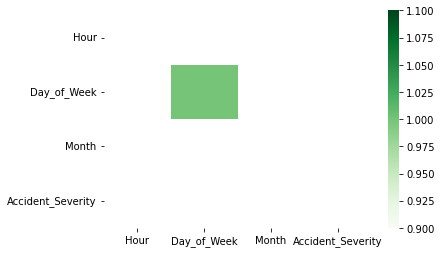

In [92]:
sns.heatmap(q7df.corr(),cmap="Greens")

In [4]:
q8df= pd.DataFrame(data=df, columns=['Journey_Purpose_of_Driver','Sex_of_Driver','Age_of_Driver','Age_Band_of_Driver','Driver_Home_Area_Type'])

NameError: name 'df' is not defined

In [95]:
q8df=q8df[q8df.Sex_of_Driver !=-1]
q8df.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,15,2,74,10,1
1,1,1,42,7,-1
2,1,1,35,6,1
3,15,1,62,9,1
4,15,2,49,8,1


In [96]:
map_df={1:'Journey as part of work',2:'Commuting to/from work',3:'Taking pupil to/from school',4:'Pupil riding to/from school',5:'Other',6:'Not known',15:'Not known/Other'}
map_df_age={1:'0 - 5',2:'6 - 10',3:'11 - 15',4:'16 - 20',5:'21 - 25',6:'26 -35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}
map_df_area={1:'Urban Area',2:'Small Town',3:'Rural'}
q8df.Age_Band_of_Driver=q8df.Age_Band_of_Driver.map(map_df_age)
q8df.Journey_Purpose_of_Driver=q8df.Journey_Purpose_of_Driver.map(map_df)
q8df.Driver_Home_Area_Type=q8df.Driver_Home_Area_Type.map(map_df_area)
q8df.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,Not known/Other,2,74,66 - 75,Urban Area
1,Journey as part of work,1,42,36 - 45,NaN
2,Journey as part of work,1,35,26 -35,Urban Area
3,Not known/Other,1,62,56 - 65,Urban Area
4,Not known/Other,2,49,46 - 55,Urban Area


<AxesSubplot:>

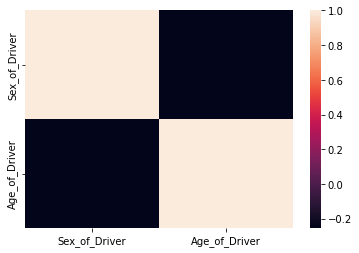

In [99]:
sns.heatmap(q8df.corr())

In [1]:
import plotly.express as px
fig = px.imshow(q8df)
fig.show()

NameError: name 'q8df' is not defined

C:\Users\PC-DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Journey Purpose of Driver vs Age_of_Driver')

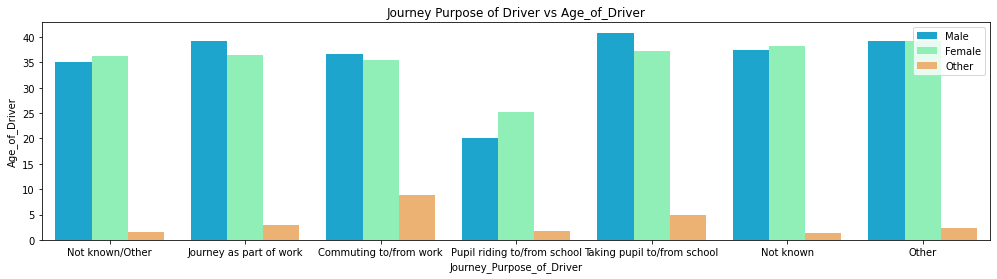

In [71]:
plt.figure(figsize=(17,4))
sns.barplot('Journey_Purpose_of_Driver','Age_of_Driver',hue='Sex_of_Driver',data=q8df,ci=None,palette='rainbow')
plt.legend(['Male','Female','Other'],loc="upper right")
plt.title('Journey Purpose of Driver vs Age_of_Driver')



C:\Users\PC-DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Driver_Home_Area_Type', ylabel='Age_of_Driver'>

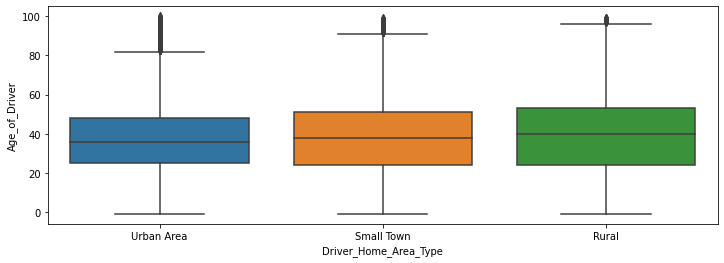

In [34]:
plt.figure(figsize=(12,4))
sns.boxplot('Driver_Home_Area_Type','Age_of_Driver',data=q8df)


In [63]:
q9df=pd.DataFrame(data=df,columns=['Accident_Severity','Light_Conditions','Weather_Conditions','Hour'])
q9df.head()


,Accident_Severity,Light_Conditions,Weather_Conditions,Hour
0,2,1,2,17
1,3,4,1,17
2,3,4,1,0
3,3,4,1,0
4,3,1,1,10


In [64]:
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'


In [65]:
q9df['Time_of_Day']=q9df['Hour'].apply(lambda x: time_of_day(x))

In [66]:
q9df.head()

,Accident_Severity,Light_Conditions,Weather_Conditions,Hour,Time_of_Day
0,2,1,2,17,Evening
1,3,4,1,17,Evening
2,3,4,1,0,Night
3,3,4,1,0,Night
4,3,1,1,10,Morning


In [67]:
q9df=q9df[q9df.Weather_Conditions!=-1]

<AxesSubplot:>

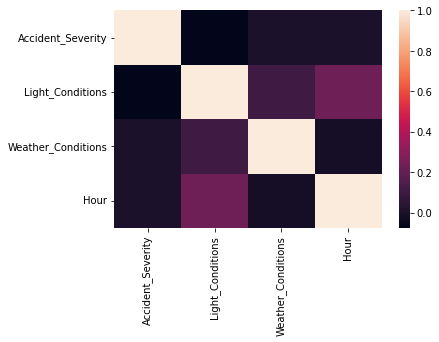

In [68]:
sns.heatmap(q9df.corr())

C:\Users\PC-DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weather vs Hour_of_Accident')

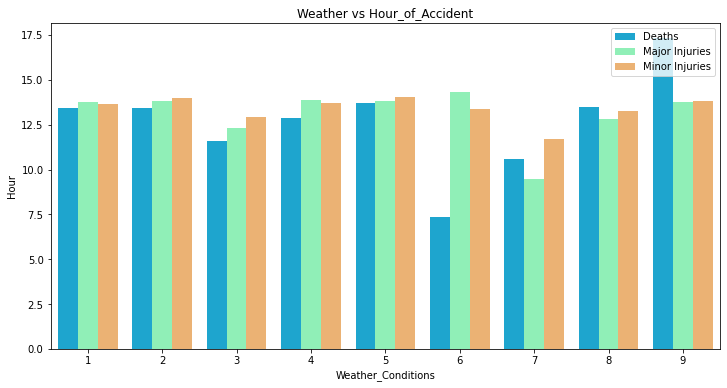

In [70]:
plt.figure(figsize=(12,6))
sns.barplot('Weather_Conditions','Hour',data=q9df,hue='Accident_Severity',ci=None, palette='rainbow')
plt.legend(['Fatal', 'Serious','Slight'],loc="upper right")
plt.title('Weather vs Hour_of_Accident')

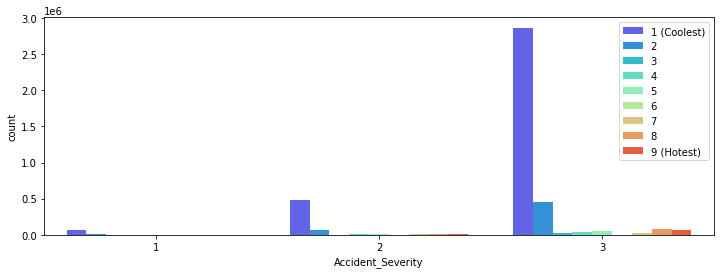

In [74]:
plt.figure(figsize=(12,4))
sns.countplot(x='Accident_Severity',data=q9df,hue='Weather_Conditions',palette='rainbow')
plt.legend(['1 (Coolest)','2','3','4','5','6','7','8','9 (Hotest)'])

In [48]:
df.Accident_Severity.value_counts()


3    1486535
2     233474
1      33005
Name: Accident_Severity, dtype: int64

In [53]:
q10df=pd.DataFrame(data=df,columns=['Vehicle_Type','Age_of_Vehicle','Was_Vehicle_Left_Hand_Drive?','Propulsion_Code','Engine_Capacity_(CC)'])

In [54]:
q10df=q10df[q10df.Age_of_Vehicle!=-1]
q10df=q10df[q10df.Propulsion_Code!=-1]
q10df=q10df[q10df['Engine_Capacity_(CC)']!=-1]

In [55]:
map_vehicle_type={1:'Pedal cycle',
2:'Motorcycle 50cc and under',
3:'Motorcycle 125cc and under',
4:'Motorcycle over 125cc and up to 500cc',
5:'Motorcycle over 500cc',
8:'Taxi/Private hire car',
9:'Car',
10:'Minibus (8 - 16 passenger seats)',
11:'Bus or coach (17 or more pass seats)',
16:'Ridden horse',
17:'Agricultural vehicle',
18:'Tram',
19:'Van / Goods 3.5 tonnes mgw or under',
20:'Goods over 3.5t. and under 7.5t',
21:'Goods 7.5 tonnes mgw and over',
22:'Mobility scooter',
23:'Electric motorcycle',
90:'Other vehicle',
97:'Motorcycle - unknown cc',
98:'Goods vehicle - unknown weight'
}
q10df['Vehicle_Type']=q10df.Vehicle_Type.map(map_vehicle_type)


In [56]:
map_prop={1:'Petrol',
2:'Heavy oil',
3:'Electric',
4:'Steam',
5:'Gas',
6:'Petrol/Gas (LPG)',
7:'Gas/Bi-fuel',
8:'Hybrid electric',
9:'Gas Diesel',
10:'New fuel technology',
11:'Fuel cells',
12:'Electric diesel'
}
q10df['Propulsion_Code']=q10df.Propulsion_Code.map(map_prop)

In [57]:
q10df=q10df[q10df['Was_Vehicle_Left_Hand_Drive?']!=-1]
q10df.head()

,Vehicle_Type,Age_of_Vehicle,Was_Vehicle_Left_Hand_Drive?,Propulsion_Code,Engine_Capacity_(CC)
1,Bus or coach (17 or more pass seats),3,1,Heavy oil,8268
2,Bus or coach (17 or more pass seats),5,1,Heavy oil,8300
3,Car,6,1,Petrol,1762
4,Car,4,1,Petrol,1769
5,Motorcycle 125cc and under,10,1,Petrol,85


C:\Users\PC-DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bus or coach (17 or more pass seats)'),
  Text(1, 0, 'Car'),
  Text(2, 0, 'Motorcycle 125cc and under'),
  Text(3, 0, 'Motorcycle over 500cc'),
  Text(4, 0, 'Motorcycle over 125cc and up to 500cc'),
  Text(5, 0, 'Taxi/Private hire car'),
  Text(6, 0, 'Van / Goods 3.5 tonnes mgw or under'),
  Text(7, 0, 'Goods 7.5 tonnes mgw and over'),
  Text(8, 0, 'Motorcycle 50cc and under'),
  Text(9, 0, 'Minibus (8 - 16 passenger seats)'),
  Text(10, 0, 'Goods over 3.5t. and under 7.5t'),
  Text(11, 0, 'Other vehicle'),
  Text(12, 0, 'Agricultural vehicle'),
  Text(13, 0, 'Motorcycle - unknown cc'),
  Text(14, 0, 'Goods vehicle - unknown weight'),
  Text(15, 0, 'Electric motorcycle')])

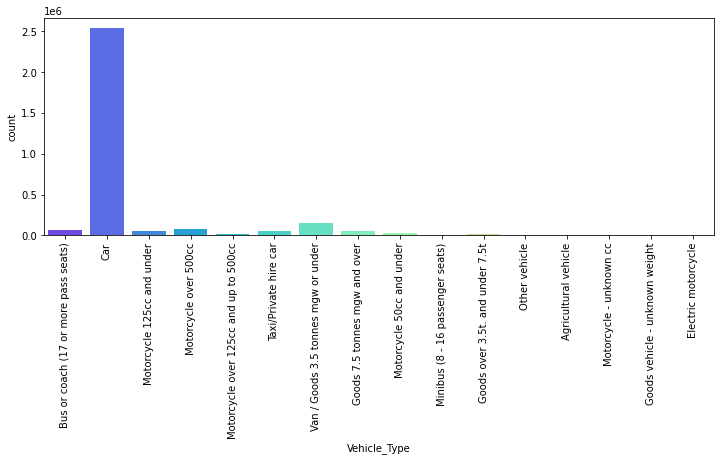

In [58]:
plt.figure(figsize=(12,4))
sns.countplot('Vehicle_Type',data=q10df, palette='rainbow')
plt.xticks(rotation=90)


C:\Users\PC-DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bus or coach (17 or more pass seats)'),
  Text(1, 0, 'Car'),
  Text(2, 0, 'Motorcycle 125cc and under'),
  Text(3, 0, 'Motorcycle over 500cc'),
  Text(4, 0, 'Motorcycle over 125cc and up to 500cc'),
  Text(5, 0, 'Taxi/Private hire car'),
  Text(6, 0, 'Van / Goods 3.5 tonnes mgw or under'),
  Text(7, 0, 'Goods 7.5 tonnes mgw and over'),
  Text(8, 0, 'Motorcycle 50cc and under'),
  Text(9, 0, 'Minibus (8 - 16 passenger seats)'),
  Text(10, 0, 'Goods over 3.5t. and under 7.5t'),
  Text(11, 0, 'Other vehicle'),
  Text(12, 0, 'Agricultural vehicle'),
  Text(13, 0, 'Motorcycle - unknown cc'),
  Text(14, 0, 'Goods vehicle - unknown weight'),
  Text(15, 0, 'Electric motorcycle')])

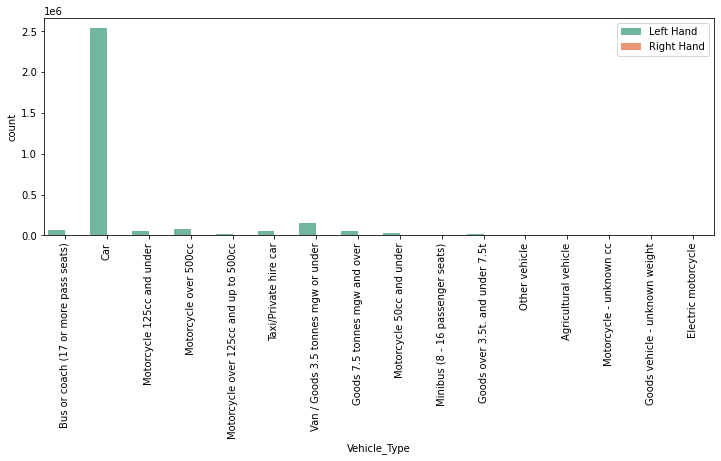

In [61]:
plt.figure(figsize=(12,4))
sns.countplot('Vehicle_Type',data=q10df, hue='Was_Vehicle_Left_Hand_Drive?',palette='Set2')
plt.legend(['Left Hand','Right Hand'],loc="upper right")
plt.xticks(rotation=90)

C:\Users\91897\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


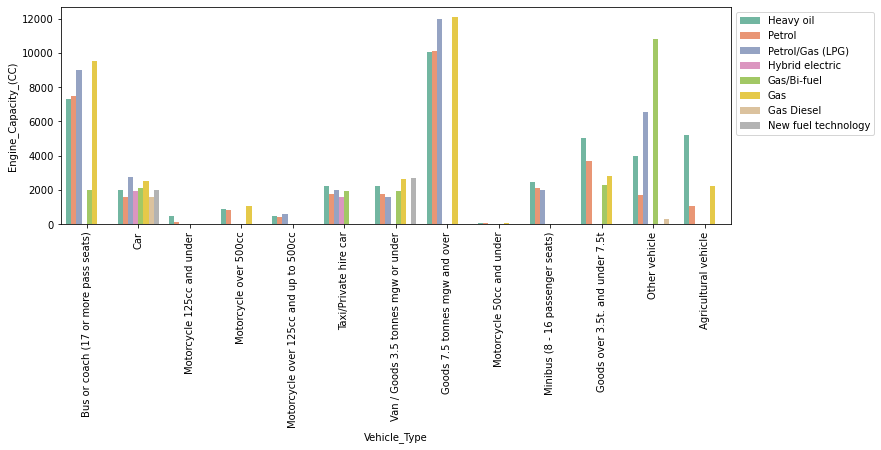

In [56]:
plt.figure(figsize=(12,4))
sns.barplot('Vehicle_Type','Engine_Capacity_(CC)',data=q10df,hue='Propulsion_Code', palette='Set2',ci=None)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))


In [57]:
fatal_df=pd.DataFrame(data=df,columns=['Sex_of_Driver','Age_of_Driver','Vehicle_Type','Month','Accident_Severity'])
fatal_df=fatal_df[(fatal_df.Sex_of_Driver!=-1) & (fatal_df.Vehicle_Type!=-1) &(fatal_df.Sex_of_Driver!=-1) & (fatal_df.Sex_of_Driver!=3)]
fatal_df.head()


,Sex_of_Driver,Age_of_Driver,Vehicle_Type,Month,Accident_Severity
0,2,74,9,1,2
1,1,42,11,1,3
2,1,35,11,1,3
3,1,62,9,1,3
4,2,49,9,1,3


In [58]:
acc=pd.get_dummies(data=fatal_df,columns=['Accident_Severity'])
sex=pd.get_dummies(data=fatal_df,columns=['Sex_of_Driver'])
sex.head()


,Age_of_Driver,Vehicle_Type,Month,Accident_Severity,Sex_of_Driver_1,Sex_of_Driver_2
0,74,9,1,2,0,1
1,42,11,1,3,1,0
2,35,11,1,3,1,0
3,62,9,1,3,1,0
4,49,9,1,3,0,1


In [59]:
fatal_df_male=pd.concat([fatal_df,acc['Accident_Severity_1'],sex['Sex_of_Driver_1']],axis=1)
fatal_df_male.head()


,Sex_of_Driver,Age_of_Driver,Vehicle_Type,Month,Accident_Severity,Accident_Severity_1,Sex_of_Driver_1
0,2,74,9,1,2,0,0
1,1,42,11,1,3,0,1
2,1,35,11,1,3,0,1
3,1,62,9,1,3,0,1
4,2,49,9,1,3,0,0


In [60]:
fatal_df_male.drop(['Accident_Severity','Sex_of_Driver'],axis=1,inplace=True)
fatal_df_male.head()


,Age_of_Driver,Vehicle_Type,Month,Accident_Severity_1,Sex_of_Driver_1
0,74,9,1,0,0
1,42,11,1,0,1
2,35,11,1,0,1
3,62,9,1,0,1
4,49,9,1,0,0


In [61]:
X=fatal_df_male.drop('Accident_Severity_1',axis=1)
y=fatal_df_male['Accident_Severity_1']

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [63]:
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)
print("\nClassification Report--> \n\n")
print(classification_report(y_test,predictions))
print("\nConfusion Matrix--> \n\n")
print(confusion_matrix(y_test,predictions))



Classification Report--> 


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    409416
           1       0.42      0.01      0.02      8057

    accuracy                           0.98    417473
   macro avg       0.70      0.51      0.51    417473
weighted avg       0.97      0.98      0.97    417473


Confusion Matrix--> 


[[409301    115]
 [  7973     84]]


In [66]:
#Decision Tree Visualization
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
clf.fit(X_train,y_train)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = X.columns.tolist(),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('data.png')
#Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [75]:
import dash_core_components as dcc

dcc.Dropdown(
    options=[
        {'label': 'New York City', 'value': 'NYC'},
        {'label': 'Montreal', 'value': 'MTL'},
        {'label': 'San Francisco', 'value': 'SF'}
    ],
    placeholder="Select a city",
)

<ipython-input-75-0b146a1e3de1>:1: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


Dropdown(options=[{'label': 'New York City', 'value': 'NYC'}, {'label': 'Montreal', 'value': 'MTL'}, {'label': 'San Francisco', 'value': 'SF'}], placeholder='Select a city')